In [79]:
import pandas as pd
import os
# Disable GPU usage (GPUs add no value for the small example and we do not need to fight for ressources this way) 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import cv2
import numpy as np
from PIL import Image

df = pd.read_csv('linearRegressionData/KI/ki-data.csv', sep=';') 
df.head()

,folder_name,weight_brutto,weight_netto,fill_level,max_weight_netto
0,1,52,0,"0,0000000000000",405.0
1,2,457,405,"1,0000000000000",NaN
2,3,445,393,"0,9703703703704",NaN
3,4,435,383,"0,9456790123457",NaN
4,5,422,370,"0,9135802469136",NaN


In [2]:
#Y = pd.DataFrame()

#Y['fill_level'] = df.fill_level

#Y.head()

Y = []
for fillLevel in df.fill_level:
    Y.append(float(fillLevel.replace(",", "." )))

In [3]:
X = [] # image data
IMG_SIZE = 32
def preprocess_image(path):
    image = np.array(Image.open(path))
    image = cv2.resize(image,(IMG_SIZE, IMG_SIZE))
    return image / 255.0
    
for folder in df.folder_name:
    path = "linearRegressionData/KI/" + str(folder)
    files = os.listdir( path )
    for file in files:
        image = preprocess_image(os.path.join(path, file))
        X.append(image)
        pass
        
X = np.array(X)

In [4]:
# save data

import pickle

pickle_out = open("Xreg.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Yreg.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [1]:
# import the data

import pickle

pickle_in = open("Xreg.pickle", "rb")
X = pickle.load(pickle_in) # load feature set
pickle_in.close()

pickle_in = open("Yreg.pickle", "rb")
Y = pickle.load(pickle_in) # load labels
pickle_in.close()

In [2]:
import numpy as np

Y = np.array(Y)
Y = Y.astype('float32')

In [ ]:
# shuffle input data

Z = list(zip(X, Y))

import random

random.shuffle(Z)
X_shuffle = []
Y_shuffle = []
for x, y in Z:
    X_shuffle.append(x)
    Y_shuffle.append(y)
    
X_shuffle = np.array(X_shuffle)
Y_shuffle = np.array(Y_shuffle)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_shuffle, Y_shuffle, test_size=0.20) # shuffled data
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(Dense(8, input_shape=(32, 32, 3), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(Dense(1, activation = 'sigmoid'))

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(Dense(64, input_shape=(32, 32, 3), activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1, activation = 'sigmoid'))

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(Dense(64, input_shape=(32, 32, 3), activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1, activation = 'sigmoid'))

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(Dense(32, input_shape=(32, 32, 3), activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1, activation = 'sigmoid'))

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(Dense(512, input_shape=(32, 32, 3), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(Dense(1, activation = 'sigmoid'))

In [60]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [61]:
import os
# Disable GPU usage (GPUs add no value for the small example and we do not need to fight for ressources this way) 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
history = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
6/6 [==============================] - 1s 12ms/step - loss: 0.0868 - accuracy: 0.0122
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.0183
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0241 - accuracy: 0.0244
Epoch 4/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0241 - accuracy: 0.0244
Epoch 5/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0225 - accuracy: 0.0244
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0151 - accuracy: 0.0244
Epoch 7/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0166 - accuracy: 0.0244
Epoch 8/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0178 - accuracy: 0.0244
Epoch 9/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0165 - accuracy: 0.0244
Epoch 10/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0146 - accuracy: 0.0244
Epoch 11/200
6/6 [=

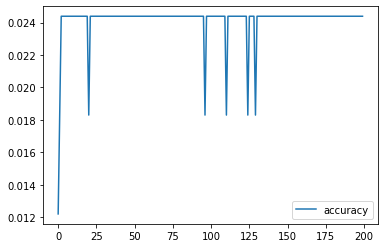

In [62]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['accuracy'], label='accuracy')

plt.legend()